In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from pylab import *

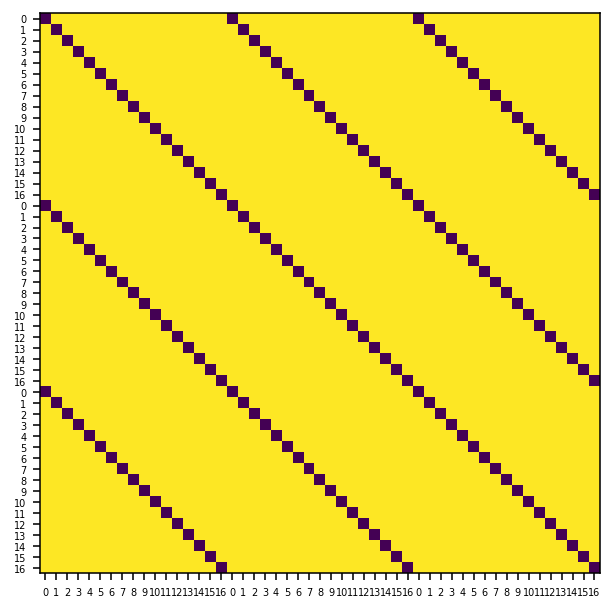

In [99]:
N = 17
mask = diag(ones(N)*nan)

def showgrid(g):
    figure(figsize=(4,4),dpi=140)
    subplots_adjust(0,0,1,1,0,0)
    g = g*(1-eye(N)) - eye(N)*N*N
    g = block([[g,g,g],[g,g,g],[g,g,g]])
    imshow(g)
    xticks(arange(N*3),[*map(str,range(N))]*3,fontsize=5)
    yticks(arange(N*3),[*map(str,range(N))]*3,fontsize=5)
    
grid = zeros((N,N))
showgrid(grid)

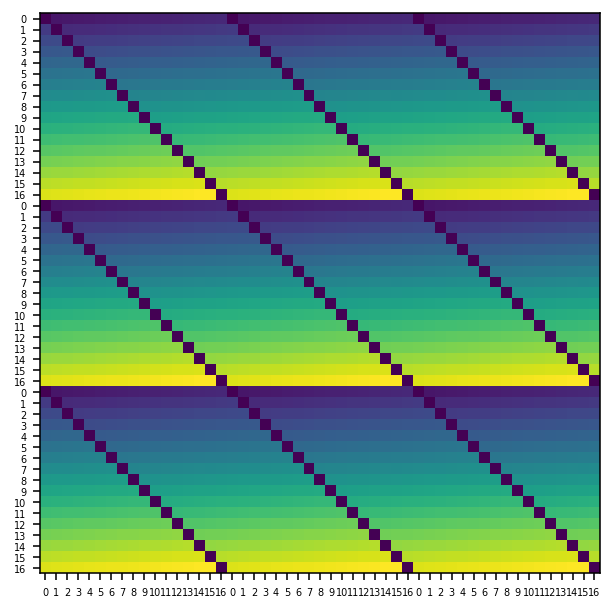

In [62]:
i = 1
for r in range(N):
    for c in range(N-1):
        c = (c + r + 1)%N
        grid[r,c] = i
        i+=1
showgrid(grid)

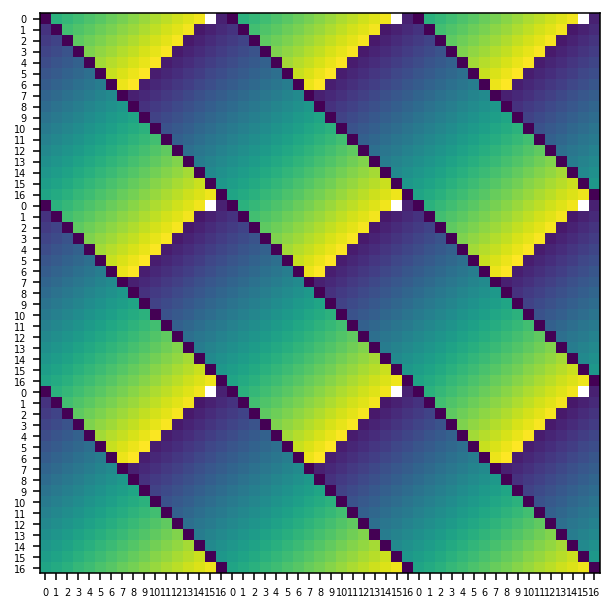

In [63]:
grid[:,:] = 0

i = 1
for vc in range(34):
    for vr in range(8):
        r = (vr+(vc//2)) %N
        c = N-2 -vr*2+(vc%2)-1
        c = (c + r + 1)%N
        if r==c:
            print('error at %d %d'%(vr,vc))
            assert 0
        grid[r,c] = nan if i==1 else i
        i+=1
showgrid(grid)

Now the tricky part: we want to

- Skip every-other
- Flip every-other-every-other
- 

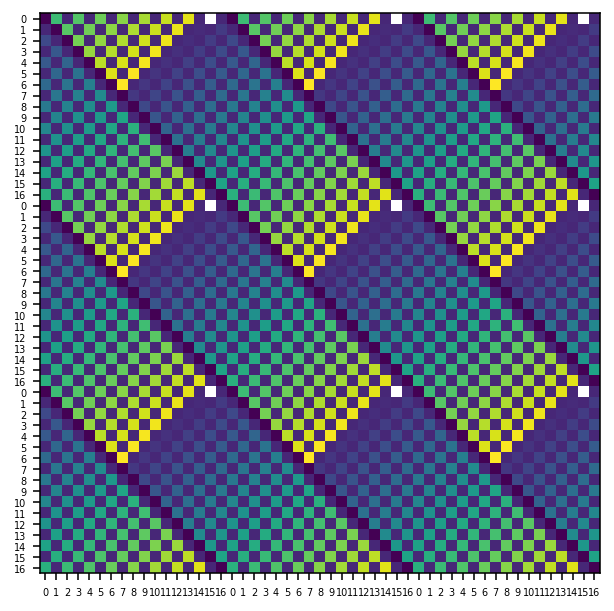

In [67]:
grid[:,:] = 0

i = 1
for vc in range(0,34,2):
    for vr in range(8):
        r = (vr+(vc//2)) %N
        c = N-2 -vr*2+(vc%2)-1
        c = (c + r + 1)%N
        if vc>=34:
            r,c = c,r
        grid[r,c] = nan if i==1 else i
        i+=1
showgrid(grid)

In [80]:
[vc%2 + vc//2 for vc in range(34)]

[0,
 1,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 12,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 16,
 16,
 17]

In [81]:
[(vc+1)//2 for vc in range(34)]

[0,
 1,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 12,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 16,
 16,
 17]

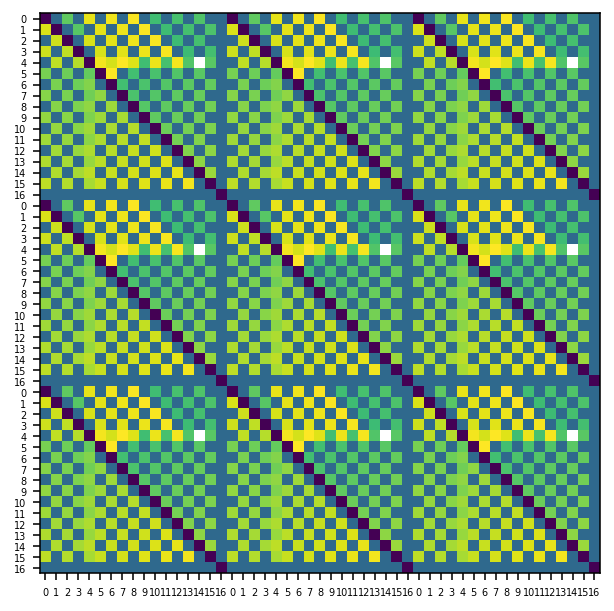

In [110]:
grid[:,:] = -N*N/2

permutation = [4,3,2,1,0,4,5,6,7,8,9,10,11,12,13,14,15,16]

i = 1
for vc in range(0,34,2):
    for vr in range(0,8,1):
        if True or (vr%2==(vc//2)%2):
            r = (vr+vc//2) %N
            c = ((vc+1)//2 - vr - 2) %N
            if vc>=34:
                r,c = c,r
            r = permutation[r]
            c = permutation[c]
            grid[r,c] = nan if i==1 else i
            i+=1
showgrid(grid)

In [113]:
[(x-1)&2 for x in range(8)]

[2, 0, 0, 2, 2, 0, 0, 2]

In [124]:
NPINS = 17
permutation = [0,5,4,1,7,2,3,6];
def remap(vr, vc):
    vr = permutation[(vr+4*(vc&1))%8];
    q  = (2+vc*21+((vr+1)//2&1)*17)%34;
    r  = (vr+q//2)%NPINS;
    c  = (NPINS+(q+1)//2-vr-2)%NPINS;
    if ((q^vr)&1): return r,c
    else:          return c,r

rr = [[remap(r,c)[0] for c in range(34)] for r in range(8)]
rc = [[remap(r,c)[1] for c in range(34)] for r in range(8)]

In [133]:
uint8(rc)

array([[ 1,  1,  5,  5,  9,  9, 13, 13,  0,  0,  4,  4,  8,  8, 12, 12,
        16, 16,  3,  3,  7,  7, 11, 11, 15, 15,  2,  2,  6,  6, 10, 10,
        14, 14],
       [14,  5,  1,  9,  5, 13,  9,  0, 13,  4,  0,  8,  4, 12,  8, 16,
        12,  3, 16,  7,  3, 11,  7, 15, 11,  2, 15,  6,  2, 10,  6, 14,
        10,  1],
       [ 5, 14,  9,  1, 13,  5,  0,  9,  4, 13,  8,  0, 12,  4, 16,  8,
         3, 12,  7, 16, 11,  3, 15,  7,  2, 11,  6, 15, 10,  2, 14,  6,
         1, 10],
       [10,  9, 14, 13,  1,  0,  5,  4,  9,  8, 13, 12,  0, 16,  4,  3,
         8,  7, 12, 11, 16, 15,  3,  2,  7,  6, 11, 10, 15, 14,  2,  1,
         6,  5],
       [ 9, 10, 13, 14,  0,  1,  4,  5,  8,  9, 12, 13, 16,  0,  3,  4,
         7,  8, 11, 12, 15, 16,  2,  3,  6,  7, 10, 11, 14, 15,  1,  2,
         5,  6],
       [ 6, 13, 10,  0, 14,  4,  1,  8,  5, 12,  9, 16, 13,  3,  0,  7,
         4, 11,  8, 15, 12,  2, 16,  6,  3, 10,  7, 14, 11,  1, 15,  5,
         2,  9],
       [13,  6,  0, 10,  4, 14,  8

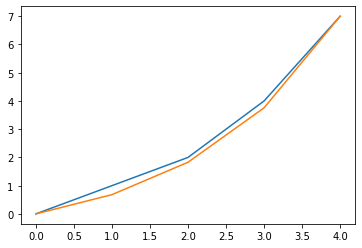

In [147]:
plot([0,1,2,4,7])
plot(2**linspace(0,log2(8),5)-1)

In [143]:
np.round(2**linspace(0,log2(7),10))

array([1., 1., 2., 2., 2., 3., 4., 5., 6., 7.])

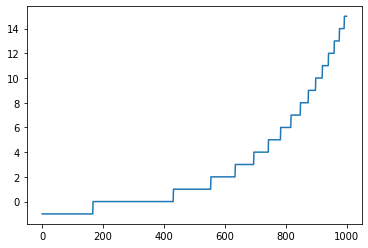

In [176]:
from collections import Counter

plot(int32(np.round(2**linspace(-2,4,1000)-1)))

c = Counter(int32(np.round(2**linspace(-2,4,1000)-1)))

In [174]:
freqs = array([c[i] for i in range(8)])

In [205]:
levels = int32(np.round(freqs*256/sum(freqs)))
print('#define MAXLEVEL (%d)'%(sum(levels)-1))
print('#define NLEVELS (%d)'%len(levels))
print('uint8_t levels[%d] = {%s};'%(len(levels),','.join(map(str,levels))))

#define MAXLEVEL (255)
#define NLEVELS (8)
uint8_t levels[8] = {99,46,30,23,18,15,13,12};


uint8_t levels[8] = {99,46,30,23,18,15,13,12};


In [194]:
''.join([('%d,'%i)*k for i,k in enumerate(levels)])

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,7,7,7,7,7,7,'

In [195]:
levels

array([53, 25, 16, 12, 10,  8,  7,  6], dtype=int32)

In [206]:
8*34

272

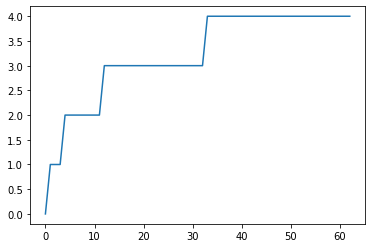

In [209]:
plot(int32(np.round(log(1+arange(63)))))

In [210]:
q = 34 + 3*(33)

In [212]:
q*34

4522

In [213]:
(q-1)/4

33.0

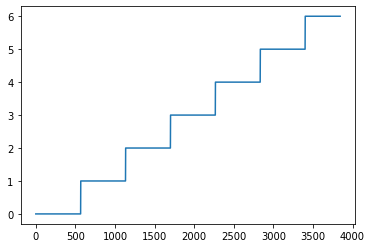

In [229]:
RES = 63
plot((int32(arange((RES-1)**2+1))*7)//(RES**2))

In [218]:
3*3

9

In [219]:
4*4

16

In [28]:
import numpy as np
from numpy.random import randint
from pylab import *

9 19
2 4 1 3
3 9 1 3


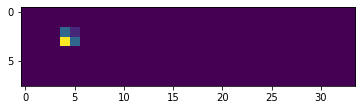

In [92]:
NROWS      = 8
NCOLS      = 34
RES        = 4
NX         = (NROWS+(RES-1)*(NROWS-1))
NY         = (NCOLS+(RES-1)*(NCOLS-1))
NZ         = 8
NPARTICLES = 3

ix = randint(NX)
iy = randint(NY)
print(ix,iy)

r  = ix//RES;
c  = iy//RES;
fr = ix%RES;
fc = iy%RES;
print(r,c,fr,fc)

w00 = (RES-fr)*(RES-fc)
w01 = (RES-fr)*fc
w10 = fr*(RES-fc)
w11 = fr*fc
print(w00,w01,w10,w11)

grid = zeros((NROWS,NCOLS))
grid[r  ,c  ] = w00
grid[r+1,c  ] = w01
grid[r  ,c+1] = w10
grid[r+1,c+1] = w11
imshow(grid)

In [57]:
(w11*7+RES**2//2)//RES**2

1

In [58]:
(w11*7)//RES**2

0

In [103]:
int32(np.round(arange(RES+1)*7/RES))

array([0, 2, 4, 5, 7], dtype=int32)

In [102]:
floor(0.97+0.02)

0.0